## 모멘텀

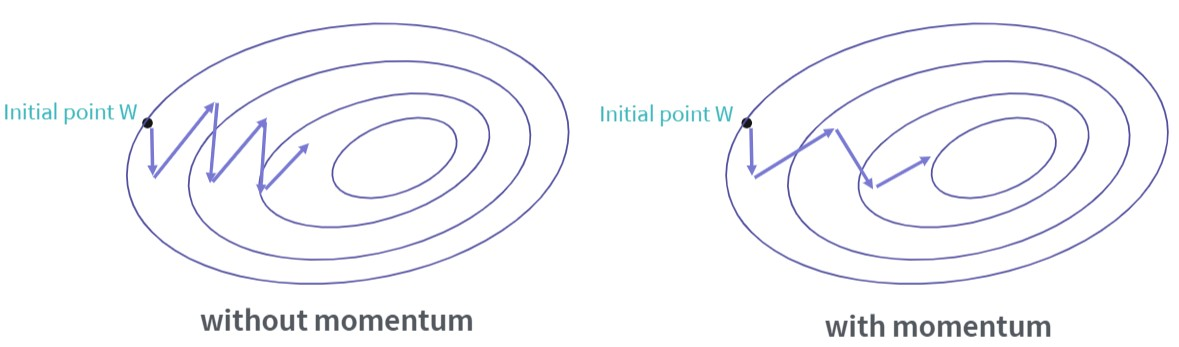

SGD는 손실 함수(loss function)의 최솟값에 도달하는 동안 Gradient가 진동하여 최적값에 도달하기까지의 시간이 오래 걸리는 단점을 가지고 있습니다. 이를 보완하기 위해 사용되는 모멘텀(momentum) 기법은 관성의 개념을 이용해 최적값에 좀 더 빠르게 도달할 수 있도록 도와줍니다

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    
    return results
    
'''
1. 모멘텀(momentum)을 적용/비적용 할 하나의 모델을 자유롭게 생성합니다.
'''
    
def Momentum_model(word_num):
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape = (word_num,), activation='relu'),
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])
    
    return model

'''
2. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

두 모델에 대해 손실 함수(loss function), 평가 방법(metrics)은 다음과 같이 동일하게 설정합니다.

손실 함수(loss) : ‘binary_crossentropy’
평가 방법(metrics): [‘accuracy’, ‘binary_crossentropy’]
단, 최적화(optimize) 알고리즘은 각각의 모델에 대해 sgd_opt, msgd_opt를 위 설명과 같이 정의하고, 변수는 아래와 똑같이 설정하여 사용합니다.

모멘텀을 적용하지 않은 모델: lr = 0.01, momentum = 0
모멘텀을 적용한 모델: lr = 0.01, momentum = 0.9
또한, 이번 실습부터는 evaluate 메소드를 이용해 두 모델을 테스트한 후, 손실 함수 값과 그래프를 출력합니다.

   Step01. Momentum_model 함수를 이용해 
           두 모델을 불러옵니다. 모두 동일한 모델입니다.
   
   Step02. 두 모델의 손실 함수, 최적화 알고리즘, 
           평가 방법을 설정합니다.
   
   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 두 모델을 각각 학습시킵니다. 
           검증용 데이터도 설정해주세요.
           두 모델 모두 'epochs'는 20, 'batch_size'는
           500으로 설정합니다.
   
   Step05. 학습된 두 모델을 테스트하고 
           binary crossentropy 값을 출력합니다. 
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''
    
def main():
    
    word_num = 100
    data_num = 25000
    
    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.
    
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)
    
    sgd_model = Momentum_model(word_num)   # 모멘텀을 사용하지 않을 모델입니다.
    msgd_model = Momentum_model(word_num)   # 모멘텀을 사용할 모델입니다.
    '''
    lr : 학습률 (learning rate) (lr >= 0), 기본값 0.1
    momentum : 진동을 막아주고 SGD를 가속하는 파라미터 (momentum >= 0), 기본값 0.9
    '''
    sgd_opt = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0) # momentum을 사용하지 않기 때문에 momentum = 0으로 설정
    sgd_model.compile(loss = 'binary_crossentropy', optimizer = sgd_opt, metrics = ['accuracy', 'binary_crossentropy'])
    
    msgd_opt = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
    msgd_model.compile(loss = 'binary_crossentropy', optimizer = msgd_opt, metrics = ['accuracy', 'binary_crossentropy'])
    
    sgd_model.summary()
    msgd_model.summary()
    
    sgd_history = sgd_model.fit(train_data, train_labels, epochs = 20, batch_size = 500, validation_data = (test_data, test_labels), verbose = 0)
    print('\n')
    msgd_history = msgd_model.fit(train_data, train_labels, epochs = 20, batch_size = 500, validation_data = (test_data, test_labels), verbose = 0)
    
    scores_sgd = sgd_model.evaluate(test_data, test_labels)
    scores_msgd = msgd_model.evaluate(test_data, test_labels)
    
    print('\nscores_sgd: ', scores_sgd[-1])
    print('scores_msgd: ', scores_msgd[-1])
    
    Visulaize([('SGD', sgd_history),('mSGD', msgd_history)])
    
    return sgd_history, msgd_history

if __name__ == "__main__":
    main()